In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 남자 48% 여자52% 비율로바꿔서남자비율이 높을수록  범죄중에 강간,폭력발생비율이높다(술먹고많이싸울거같음)

import pandas as pd

crime = pd.read_csv("실습이지롱.csv")
pop = pd.read_excel("01. population_in_Seoul.xls", header =2 ,usecols="B,D,E,F")


crime["범죄총건수"] = crime['살인 발생']+ crime['강도 발생']+crime['강간 발생']+crime['절도 발생']+crime['폭력 발생']
crime["폭력발생율"] = crime["폭력 발생"] / crime["범죄총건수"] * 100
crime["강도발생율"] = crime["강도 발생"] / crime["범죄총건수"] * 100
crime["살인발생율"] = crime["살인 발생"] / crime["범죄총건수"] * 100
crime["강간발생율"] = crime["강간 발생"] / crime["범죄총건수"] * 100
crime["절도발생율"] = crime["절도 발생"] / crime["범죄총건수"] * 100
crime.head()


,구별,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,범죄총건수,폭력발생율,강도발생율,살인발생율,강간발생율,절도발생율
0,강남구,13,10,21,18,449,349,3850,1650,4284,3705,8617,49.715678,0.243704,0.150865,5.210630,44.679123
1,강동구,4,3,6,8,156,123,2366,789,2712,2248,5244,51.716247,0.114416,0.076278,2.974828,45.118230
2,강북구,7,8,14,13,153,126,1434,618,2649,2348,4257,62.226920,0.328870,0.164435,3.594080,33.685694
3,강서구,7,8,13,13,262,191,2096,1260,3207,2718,5585,57.421665,0.232766,0.125336,4.691137,37.529096
4,관악구,9,8,12,14,320,221,2706,827,3298,2642,6345,51.977935,0.189125,0.141844,5.043341,42.647754


In [4]:

pop["남자비율"] = pop["남자"] / pop["계"] * 100
pop = pop.rename(
    columns={
    "자치구": "구별"}
)
# 남자 48% 여자52% 비율로바꿔서남자비율이 높을수록  범죄중에 강간,폭력발생비율이높다(술먹고많이싸울거같음)
pop.head()

,구별,계,남자,여자,남자비율
0,합계,10197604.0,5000005.0,5197599.0,49.031174
1,종로구,162820.0,79675.0,83145.0,48.934406
2,중구,133240.0,65790.0,67450.0,49.377064
3,용산구,244203.0,119132.0,125071.0,48.784003
4,성동구,311244.0,153768.0,157476.0,49.404326


In [5]:
result = pd.merge(crime, pop, on="구별", how="inner")
result1 = result[["구별","남자","남자비율","폭력발생율","폭력 발생","범죄총건수","강간발생율","절도발생율","살인발생율","강도발생율"]]
result1
result_sorted = result1.sort_values(by="남자비율", ascending=False)
result_sorted = result_sorted.set_index("구별")
result_sorted

,남자,남자비율,폭력발생율,폭력 발생,범죄총건수,강간발생율,절도발생율,살인발생율,강도발생율
구별,,,,,,,,,
금천구,130558.0,51.182757,54.324253,2054,3781,3.993652,41.444062,0.079344,0.158688
관악구,264763.0,50.381626,51.977935,3298,6345,5.043341,42.647754,0.141844,0.189125
영등포구,202573.0,50.268124,52.016892,3572,6867,4.295908,43.162953,0.203874,0.320373
구로구,224436.0,50.111415,53.258944,3007,5646,4.976975,41.356713,0.141693,0.265675
강동구,225427.0,49.737552,51.716247,2712,5244,2.974828,45.118230,0.076278,0.114416
중랑구,206102.0,49.722680,54.823801,2847,5193,3.601001,41.113037,0.250337,0.211824
동대문구,182932.0,49.508520,53.983051,2548,4720,3.665254,41.970339,0.105932,0.275424
성동구,153768.0,49.404326,48.004765,1612,3358,3.752233,47.855867,0.119119,0.268017
양천구,237117.0,49.401639,55.410777,2509,4528,2.650177,41.740283,0.066254,0.132509


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


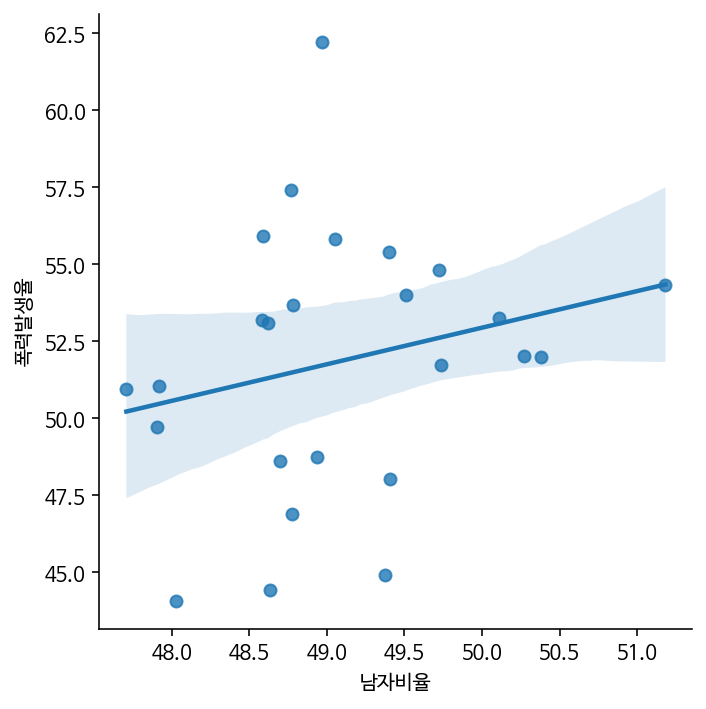

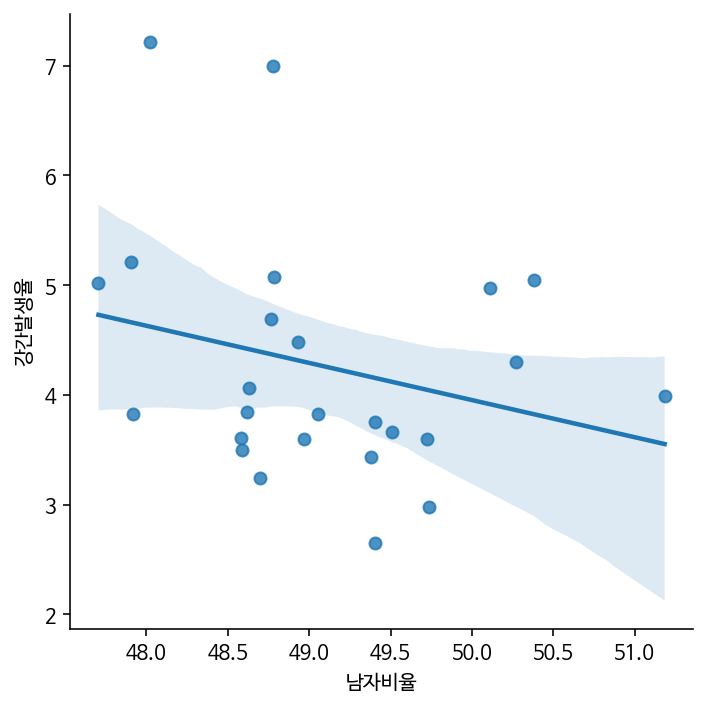

In [7]:

sns.lmplot(x='남자비율', y='폭력발생율', data=result_sorted)
sns.lmplot(x='남자비율', y='강간발생율', data=result_sorted)
plt.show()


# 폭력은 쬐깐 관련있지만 강간은 오히려 감소!

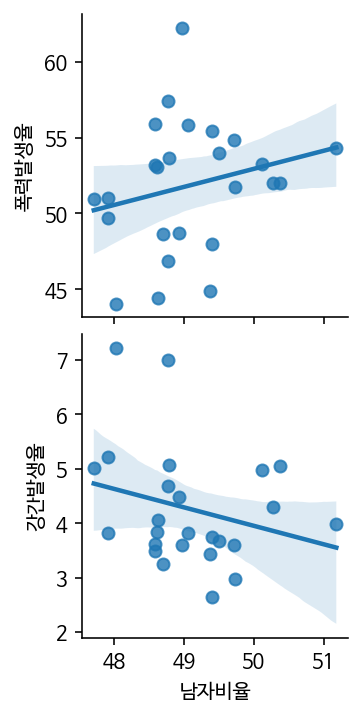

In [8]:

sns.pairplot(
    data=result_sorted,
    x_vars="남자비율",
    y_vars=["폭력발생율","강간발생율"],
    kind="reg")

plt.show()

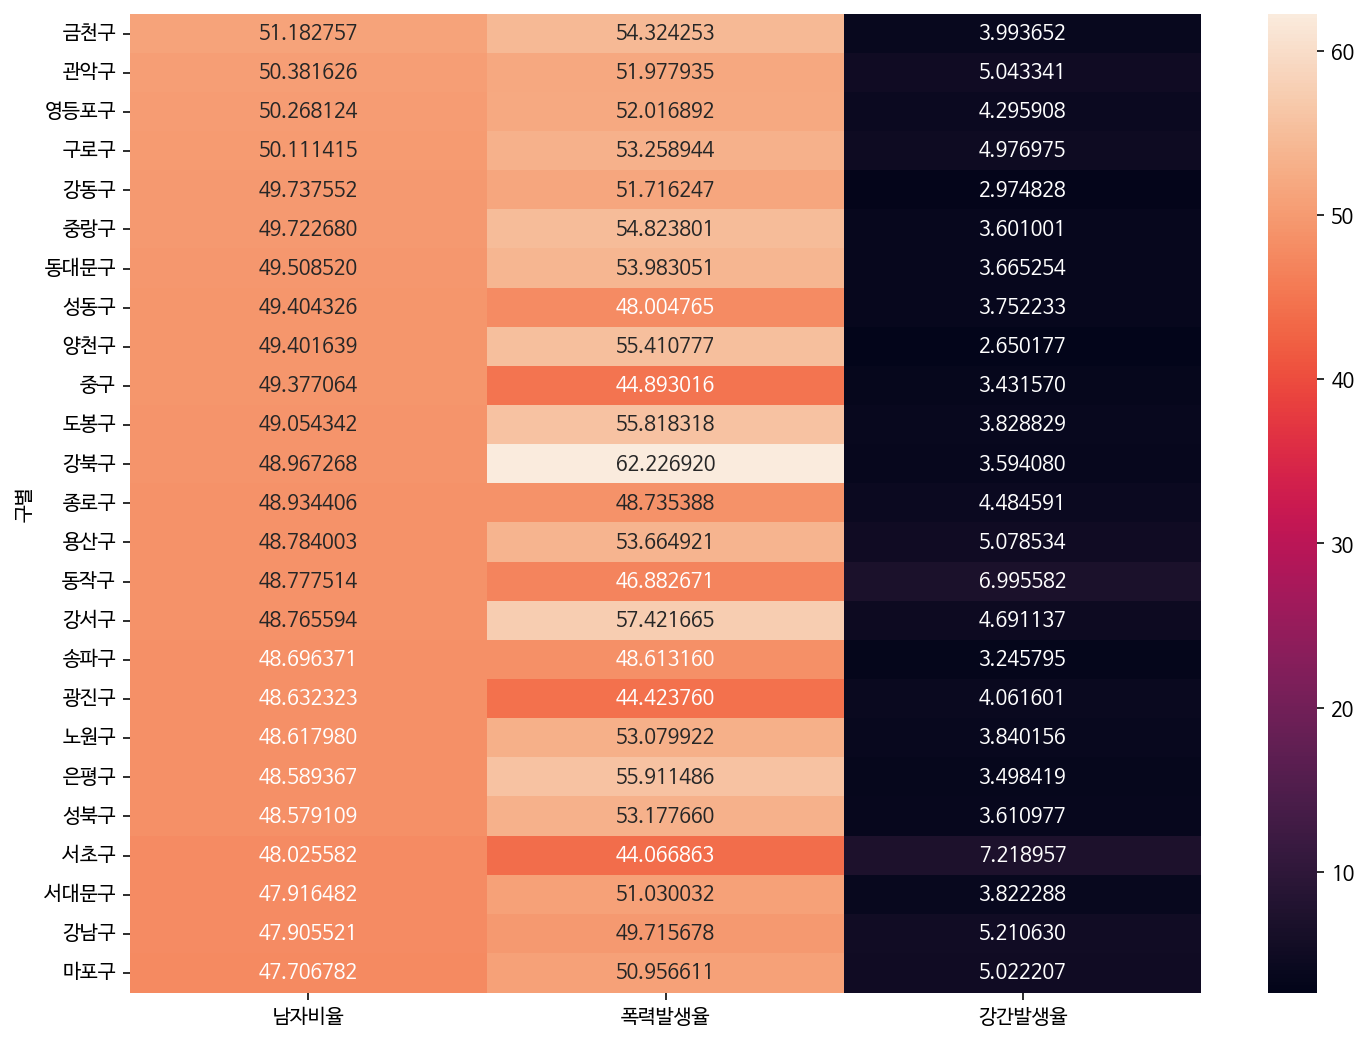

In [9]:
sns.heatmap(
    result_sorted[["남자비율","폭력발생율","강간발생율"]],
    annot = True,
    fmt='f'
)

plt.show()

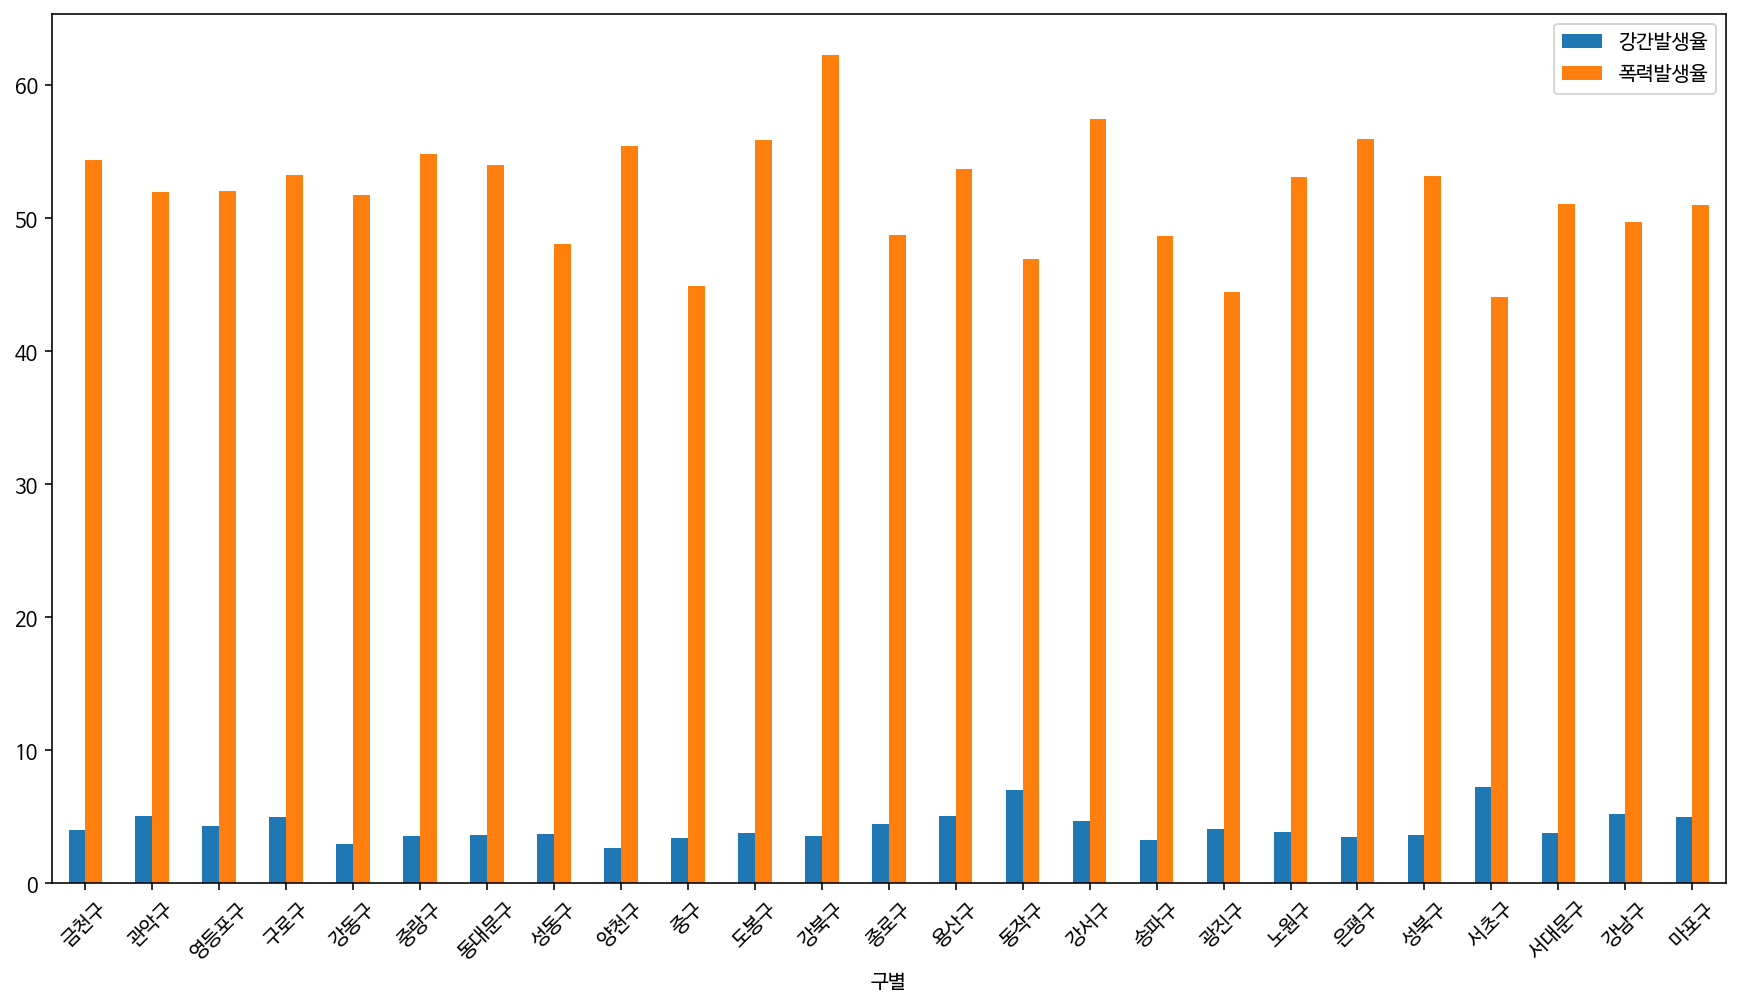

In [41]:

g = result_sorted.plot(y=["강간발생율","폭력발생율"], kind="bar")
g.figure.set_size_inches(15, 8)


plt.xticks(rotation=45)
plt.show()